Importing Libraries

In [3]:
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import zipfile
import os

Unzip The Dataset given in the Drive File Name : dataset.zip

In [4]:
zip_file_path = '/content/dataset.zip'


extracted_dir = '/content/dataset'

os.makedirs(extracted_dir, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


extracted_files = os.listdir(extracted_dir)
print(f"Extracted files: {extracted_files}")

Extracted files: ['train', 'valid', 'README.dataset.txt', 'README.roboflow.txt']


Reading the annotation.csv file into a DataFrame Object

In [5]:
annotations_df = pd.read_csv('/content/dataset/train/_annotations.csv')

In [6]:
annotations_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg,640,640,rust,0,539,120,593
1,53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg,640,640,rust,61,580,95,640
2,53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg,640,640,rust,422,312,456,585
3,53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg,640,640,rust,330,455,349,490
4,53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg,640,640,rust,301,449,324,484


In [7]:
annotations_df.columns

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')

In [8]:
image_paths = annotations_df['filename'].values
class_labels = annotations_df['class'].values

In [9]:
image_paths

array(['53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg',
       '53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg',
       '53_jpg.rf.249070f5ab7bd8dc0b59d839110277b0.jpg', ...,
       '98_jpg.rf.fff4644467ce317761c80c8773f0a1e9.jpg',
       '98_jpg.rf.fff4644467ce317761c80c8773f0a1e9.jpg',
       '98_jpg.rf.fff4644467ce317761c80c8773f0a1e9.jpg'], dtype=object)

In [10]:
class_labels

array(['rust', 'rust', 'rust', ..., 'rust', 'rust', 'dent'], dtype=object)

In [11]:
annotations_df['filename'] = extracted_dir + '/' + annotations_df['filename']

In [12]:
annotations_df['filename']

0       /content/dataset/53_jpg.rf.249070f5ab7bd8dc0b5...
1       /content/dataset/53_jpg.rf.249070f5ab7bd8dc0b5...
2       /content/dataset/53_jpg.rf.249070f5ab7bd8dc0b5...
3       /content/dataset/53_jpg.rf.249070f5ab7bd8dc0b5...
4       /content/dataset/53_jpg.rf.249070f5ab7bd8dc0b5...
                              ...                        
1570    /content/dataset/98_jpg.rf.fff4644467ce317761c...
1571    /content/dataset/98_jpg.rf.fff4644467ce317761c...
1572    /content/dataset/98_jpg.rf.fff4644467ce317761c...
1573    /content/dataset/98_jpg.rf.fff4644467ce317761c...
1574    /content/dataset/98_jpg.rf.fff4644467ce317761c...
Name: filename, Length: 1575, dtype: object

 Loading images into an array and resize them to a consistent size

In [13]:

images = []
for i, image_path in enumerate(image_paths):
    img = Image.open(f"/content/dataset/train/{image_path}")
    img = img.resize((224, 224))
    img_array = np.array(img)
    images.append(img_array)


In [14]:
images[0]

array([[[164, 168, 177],
        [164, 168, 177],
        [166, 170, 179],
        ...,
        [231, 231, 231],
        [234, 234, 234],
        [238, 238, 238]],

       [[149, 153, 162],
        [149, 153, 162],
        [151, 155, 164],
        ...,
        [221, 221, 221],
        [223, 223, 223],
        [228, 228, 228]],

       [[150, 154, 163],
        [150, 154, 163],
        [151, 155, 164],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [229, 229, 229]],

       ...,

       [[103,  90,  65],
        [140, 124,  98],
        [126, 109,  82],
        ...,
        [130,  75,  58],
        [151,  86,  69],
        [165,  91,  74]],

       [[105,  93,  70],
        [142, 128, 103],
        [133, 117,  91],
        ...,
        [138,  76,  55],
        [147,  80,  60],
        [162,  92,  74]],

       [[105,  94,  71],
        [144, 130, 105],
        [136, 120,  95],
        ...,
        [146,  84,  58],
        [149,  86,  64],
        [153,  87,  68]]

Classes in Our Dataset :

*   Dent
*   Rust
*   Hole




In [15]:
values, counts = np.unique(class_labels, return_counts=True)
values

array(['dent', 'hole', 'rust'], dtype=object)

Bounding Box Coordinates of each images

In [16]:

bbox_coordinates = annotations_df[['xmin', 'ymin', 'xmax', 'ymax']].values

In [17]:
bbox_coordinates

array([[  0, 539, 120, 593],
       [ 61, 580,  95, 640],
       [422, 312, 456, 585],
       ...,
       [467, 256, 481, 315],
       [528, 264, 551, 398],
       [  8, 279,  22, 307]])

Useing LabelEncoder for encoding class labels

In [18]:

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_labels)

one_hot_labels = to_categorical(encoded_labels, num_classes=len(label_encoder.classes_))



In [19]:
bounding_boxes = np.array(bbox_coordinates)

Spliting the Data

In [20]:
X_train, X_val, y_train, y_val, bbox_train, bbox_val = train_test_split(images, one_hot_labels, bounding_boxes, test_size=0.2, random_state=42)

Creating the Convolutional Neural Network With Two Seperate Branches One for the Images another one for the Bunding Box Coordinates

# Classification branch


In [21]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
classification_output = Dense(len(label_encoder.classes_), activation='softmax', name='classification_output')(x)


Regression branch


In [22]:
x = Conv2D(64, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
bounding_box_output = Dense(4, activation='linear', name='bounding_box_output')(x)  # 4 outputs for xmin, ymin, xmax, ymax

epochs=15, batch_size=32,

In [23]:
model = Model(inputs=input_layer, outputs=[classification_output, bounding_box_output])

model.compile(optimizer='adam',
              loss={'classification_output': 'categorical_crossentropy', 'bounding_box_output': 'mse'},
              metrics={'classification_output': 'accuracy'})

model.fit(np.array(X_train), {'classification_output': np.array(y_train), 'bounding_box_output': np.array(bbox_train)},
          epochs=15, batch_size=32,
          validation_data=(np.array(X_val), {'classification_output': np.array(y_val), 'bounding_box_output': np.array(bbox_val)}))

Epoch 1/15
40/40 [==============================] - 20s 229ms/step - loss: 1412589.3750 - classification_output_loss: 95.8819 - bounding_box_output_loss: 1412493.2500 - classification_output_accuracy: 0.6016 - val_loss: 33695.1133 - val_classification_output_loss: 0.6585 - val_bounding_box_output_loss: 33694.4492 - val_classification_output_accuracy: 0.7238
Epoch 2/15
40/40 [==============================] - 6s 139ms/step - loss: 40131.2305 - classification_output_loss: 0.6569 - bounding_box_output_loss: 40130.5820 - classification_output_accuracy: 0.7667 - val_loss: 22977.1484 - val_classification_output_loss: 0.6171 - val_bounding_box_output_loss: 22976.5293 - val_classification_output_accuracy: 0.7524
Epoch 3/15
40/40 [==============================] - 6s 140ms/step - loss: 35970.9492 - classification_output_loss: 0.6250 - bounding_box_output_loss: 35970.3242 - classification_output_accuracy: 0.7810 - val_loss: 22363.0527 - val_classification_output_loss: 0.5836 - val_bounding_box_o

In [25]:
eval_results = model.evaluate(np.array(X_val), {'classification_output': np.array(y_val), 'bounding_box_output': np.array(bbox_val)})


print("Evaluation Results:", eval_results)


classification_accuracy = eval_results[3]
print(f"Classification Accuracy: {classification_accuracy * 100:.2f}%")


if len(eval_results) > 4:
    bounding_box_mse = eval_results[4]
    print(f"Bounding Box MSE: {bounding_box_mse:.2f}")
else:
    print("Bounding Box MSE not available in the evaluation results.")

10/10 [==============================] - 0s 37ms/step - loss: 21625.4648 - classification_output_loss: 0.6462 - bounding_box_output_loss: 21624.8184 - classification_output_accuracy: 0.7714
Evaluation Results: [21625.46484375, 0.6462162137031555, 21624.818359375, 0.7714285850524902]
Classification Accuracy: 77.14%
Bounding Box MSE not available in the evaluation results.


Saving the Model

In [26]:
model.save('/content/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Loading the Model And Preprocessing


In [29]:
saved_model_path = '/content/model.h5'
model = load_model(saved_model_path)

input_image_path = '/content/dataset/train/28_jpg.rf.bd9b4bf664bb43e5310ab6d79416f286.jpg'
input_image = Image.open(input_image_path)
input_image_resized = input_image.resize((224, 224))
input_image_normalized = np.array(input_image_resized) / 255.0
input_image_expanded = np.expand_dims(input_image_normalized, axis=0)

In [31]:
predictions = model.predict(input_image_expanded)

class_predictions = predictions[0]
predicted_class_index = np.argmax(class_predictions)
predicted_class = label_encoder.classes_[predicted_class_index]


bounding_box_predictions = predictions[1][0]

1/1 [==============================] - 1s 523ms/step


Predicted Class: rust
Predicted Bounding Box Coordinates: [1079.46510315 1237.60360718 1215.65971375 1593.67355347]


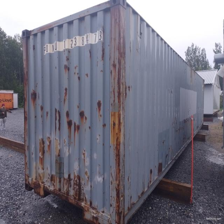

In [32]:
image_width, image_height = input_image.size
predicted_bbox = bounding_box_predictions * np.array([image_width, image_height, image_width, image_height])

print("Predicted Class:", predicted_class)
print("Predicted Bounding Box Coordinates:", predicted_bbox)


input_image_with_bbox = np.array(input_image_resized)
xmin, ymin, xmax, ymax = predicted_bbox.astype(int)
cv2.rectangle(input_image_with_bbox, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

from IPython.display import display

display(Image.fromarray(np.uint8(input_image_resized)))

Note : Coudn't Find Any Video That I Could Utilize to Check how my model perfroms on that video. The Datasets from Roboflow does not contain any videos. The Model is Built with an Accuracy of Near 80% With just 15 Epochs.

After Running 30-50 Epochs the model has pottential to perform more that 90% accuracy.

There are still scopes for improvement with more Data Augmentation and Synthetic Image Creating which could help improve the overall model accuracy and performence

Bellow is The code to divide images from given videos into seperate folders of images of cargo with defect and with no defect

In [34]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from IPython.display import display
import os

In [35]:
saved_model_path = '/content/model.h5'
model = load_model(saved_model_path)

In [ ]:

output_folder_with_classes = '/content/frames_with_classes'
output_folder_without_classes = '/content/frames_without_classes'

os.makedirs(output_folder_with_classes, exist_ok=True)
os.makedirs(output_folder_without_classes, exist_ok=True)


In [ ]:
video_path = 'video.mp4'
cap = cv2.VideoCapture(video_path)


fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Processing each frame

In [ ]:
while True:
    ret, frame = cap.read()

    if not ret:
        break


    input_frame_resized = cv2.resize(frame, (224, 224))
    input_frame_normalized = input_frame_resized / 255.0
    input_frame_expanded = np.expand_dims(input_frame_normalized, axis=0)


    predictions = model.predict(input_frame_expanded)


    class_predictions = predictions[0]
    predicted_class_index = np.argmax(class_predictions)
    predicted_class = label_encoder.classes_[predicted_class_index]


    if predicted_class != 'no_class':
        output_path = os.path.join(output_folder_with_classes, f'frame_{fps}_{predicted_class}.jpg')
    else:
        output_path = os.path.join(output_folder_without_classes, f'frame_{fps}.jpg')

    cv2.imwrite(output_path, frame)

In [ ]:
cap.release()

print("Frames with classes saved in:", output_folder_with_classes)
print("Frames without classes saved in:", output_folder_without_classes)